In [12]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
# Function to extract features from audio files and trim them
def extract_features_and_trim(audio_file, max_length=100):
    y, sr = librosa.load(audio_file)  # Load audio file
    y_trimmed, _ = librosa.effects.trim(y, top_db=20)  # Trim audio file
    
    # Extract features from trimmed audio
    mfccs = librosa.feature.mfcc(y=y_trimmed, sr=sr, n_mfcc=13)
    
    # Pad or truncate features to ensure they all have the same length
    if mfccs.shape[1] < max_length:
        pad_width = max_length - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfccs = mfccs[:, :max_length]
    
    return mfccs

# Function to process audio files in a folder and extract trimmed features
def process_audio_folder_and_trim(folder_path, max_length=100):
    features = []
    sample_audio_file = None
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.wav'):  # Check if file is a WAV audio file
                audio_file = os.path.join(root, file)
                if sample_audio_file is None:
                    sample_audio_file = audio_file
                mfccs = extract_features_and_trim(audio_file, max_length=max_length)
                features.append(mfccs)
    return features

# Main function to analyze audio data and extract trimmed features
def analyze_audio_data_and_trim(main_folder, max_length=100):
    all_features = []
    labels = []
    sample_waveforms = {}
    for folder in os.listdir(main_folder):
        folder_path = os.path.join(main_folder, folder)
        if os.path.isdir(folder_path):
            print(f"Processing folder: {folder}")
            folder_features = process_audio_folder_and_trim(folder_path, max_length=max_length)
            all_features.extend(folder_features)
            labels.extend([folder] * len(folder_features))
    return all_features, labels

    return all_features, labels, sample_waveforms


In [20]:
# Set the main folder containing subfolders with audio files
main_folder = 'C:\\Users\\krvbh\\OneDrive\\Documents\\Projects\\ML\\archive'

trimmed_features, labels = analyze_audio_data_and_trim(main_folder, max_length=100)

# Convert features and labels to numpy arrays
X_trimmed = np.array(trimmed_features)
y_trimmed = np.array(labels)

# Display basic information about the trimmed dataset
print(f"Number of trimmed audio samples: {len(X_trimmed)}")
print(f"Number of unique labels in trimmed dataset: {len(np.unique(y_trimmed))}")
print(f"Labels in trimmed dataset: {np.unique(y_trimmed)}")

Processing folder: Actor_01
Processing folder: Actor_02
Processing folder: Actor_03
Processing folder: Actor_06
Processing folder: Actor_07
Processing folder: Actor_4
Processing folder: Actor_5
Processing folder: speech_actors
Number of trimmed audio samples: 900
Number of unique labels in trimmed dataset: 8
Labels in trimmed dataset: ['Actor_01' 'Actor_02' 'Actor_03' 'Actor_06' 'Actor_07' 'Actor_4'
 'Actor_5' 'speech_actors']


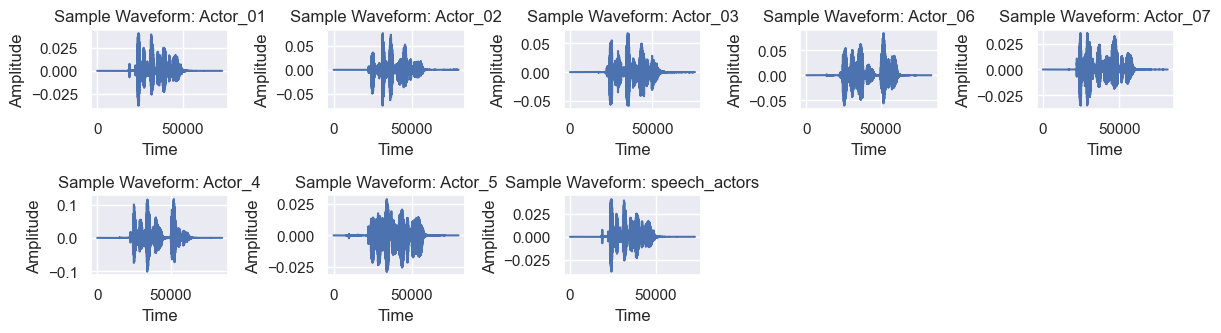

In [21]:
# Visualize sample waveforms
plt.figure(figsize=(12, 8))
for i, (folder, audio_file) in enumerate(sample_waveforms.items(), start=1):
    plt.subplot(5, 5, i)
    y, sr = librosa.load(audio_file)
    plt.plot(y)
    plt.title(f'Sample Waveform: {folder}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()
